In [ ]:
import cv2
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving test_image.jpg to test_image (1).jpg


In [ ]:
image=cv2.imread('test_image.jpg')

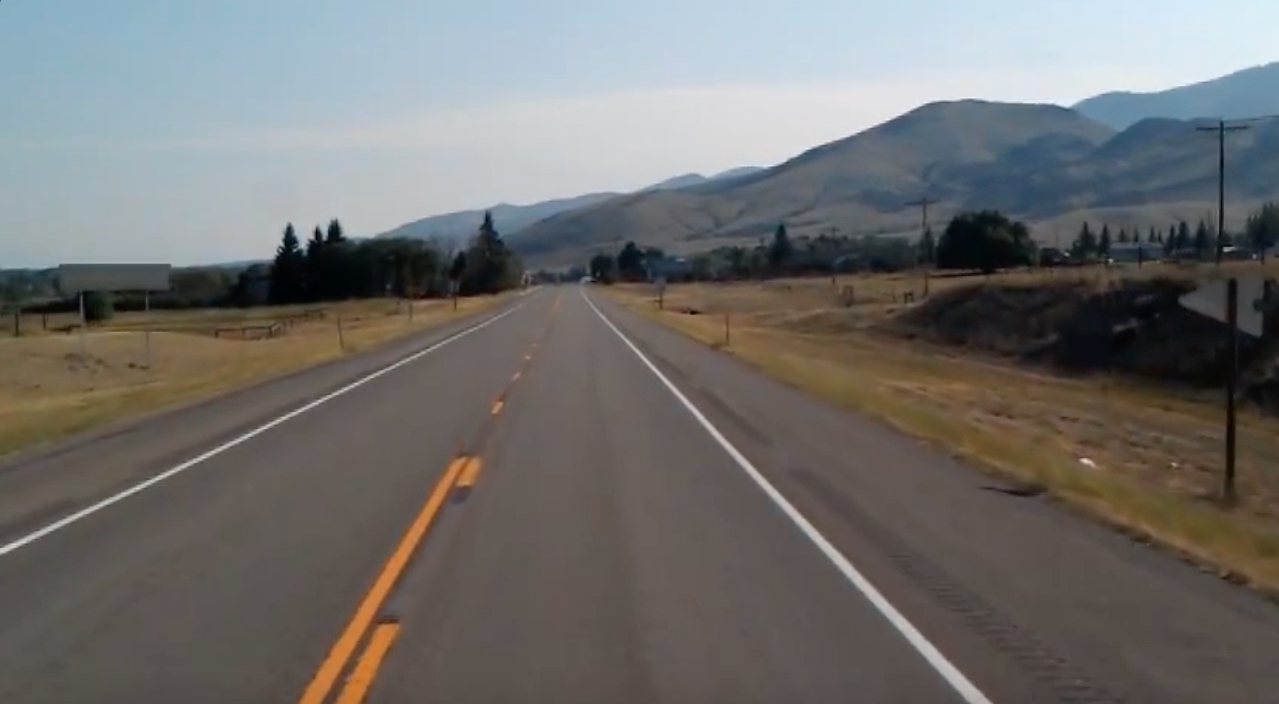

-1

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2.waitKey(0)

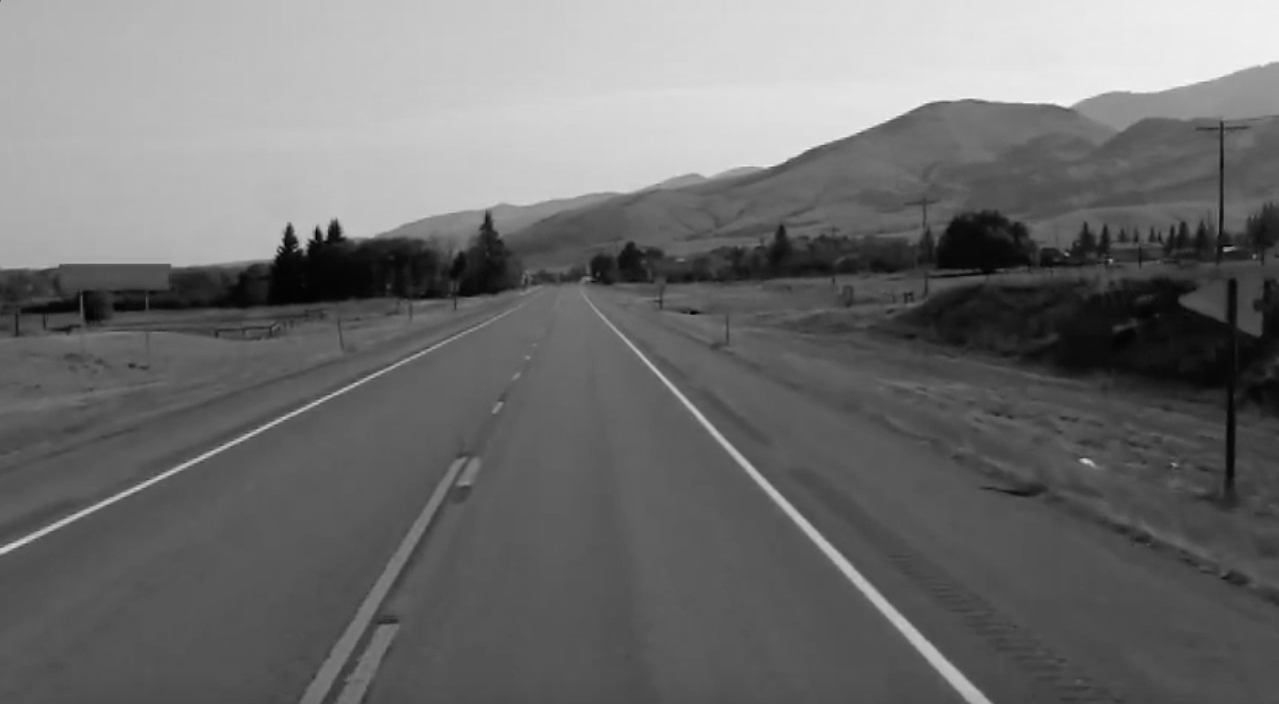

In [ ]:
import numpy as np
lane_image=np.copy(image)
gray=cv2.cvtColor(lane_image,cv2.COLOR_RGB2GRAY)
cv2_imshow(gray)

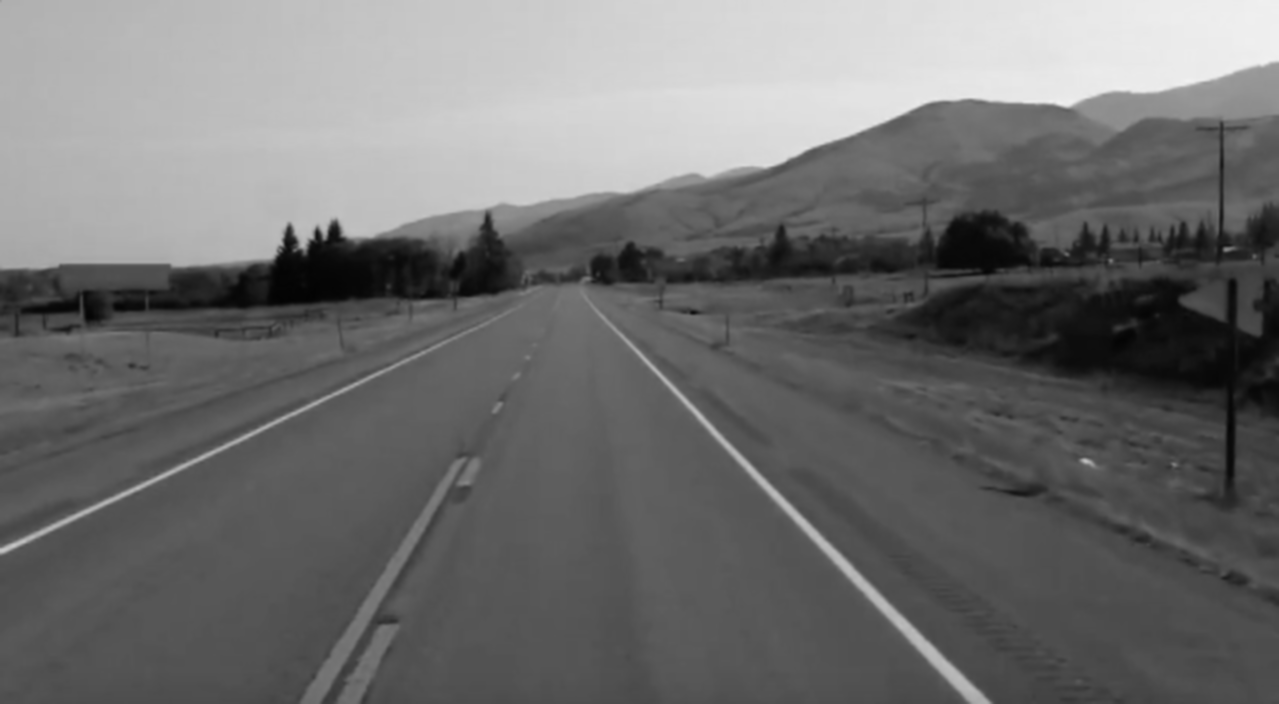

In [ ]:
blur=cv2.GaussianBlur(gray,(5,5),0)
cv2_imshow(blur)

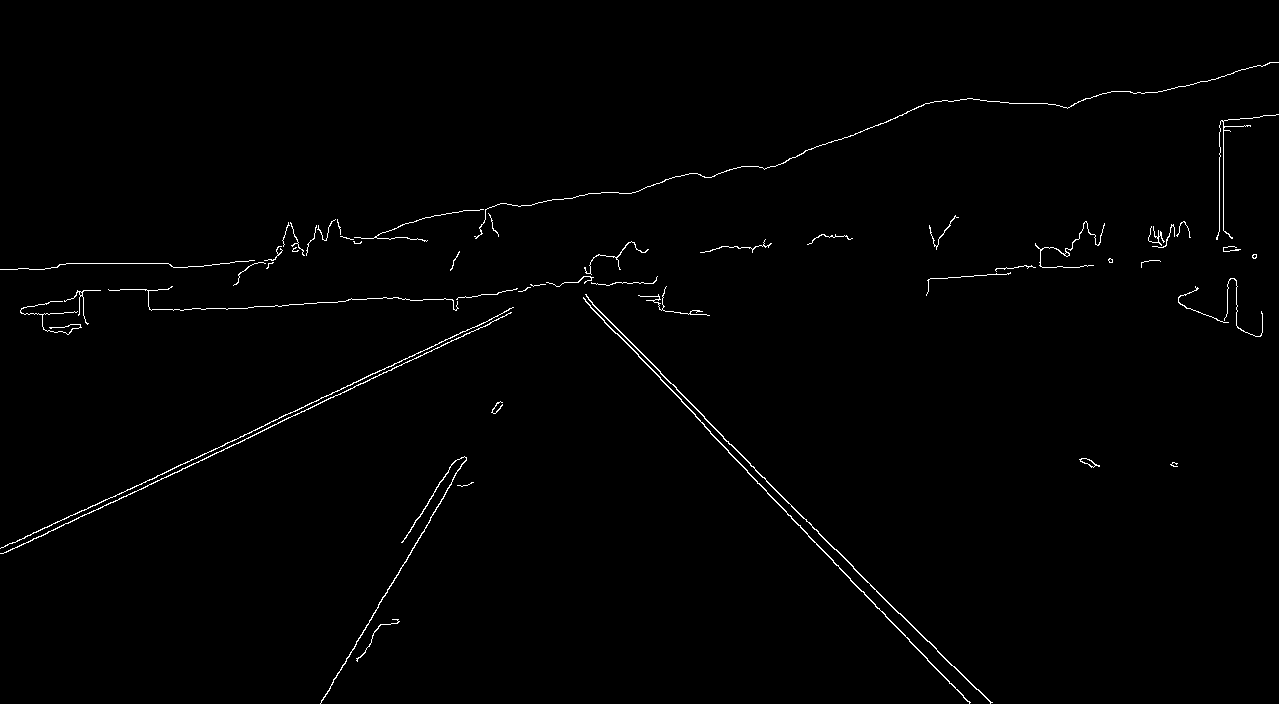

In [ ]:
canny=cv2.Canny(blur,50,150)
cv2_imshow(canny)

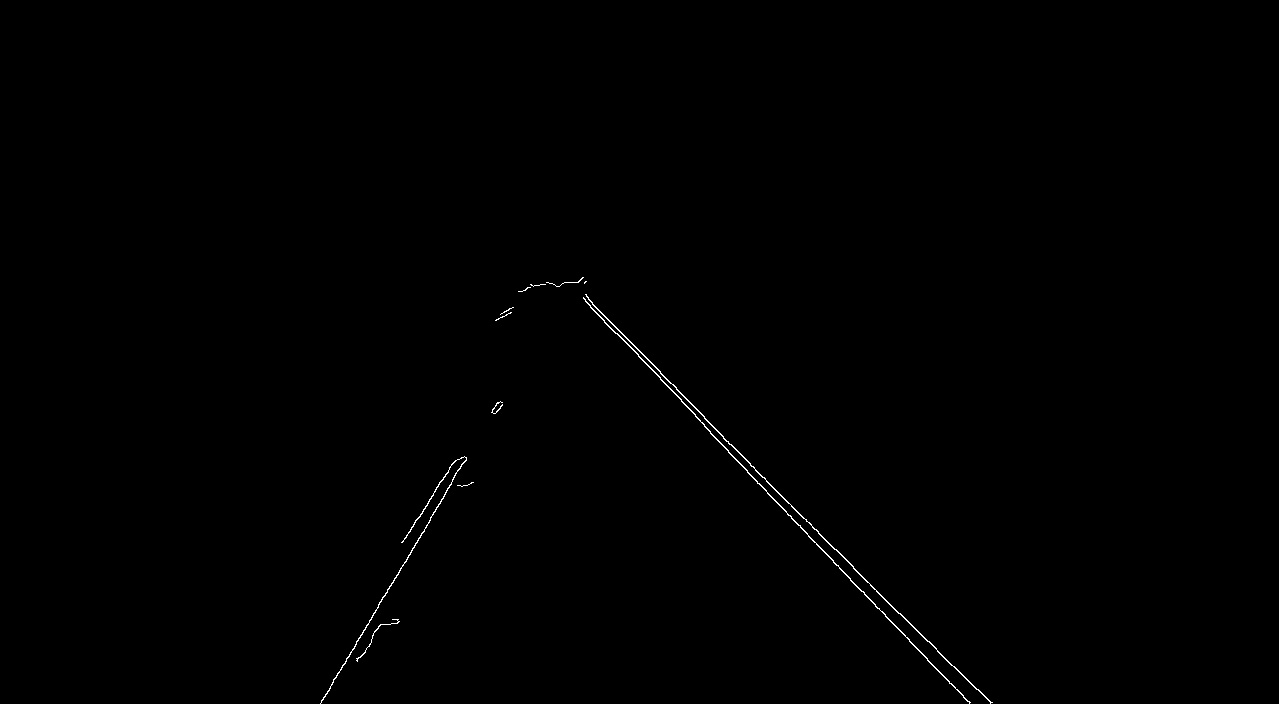

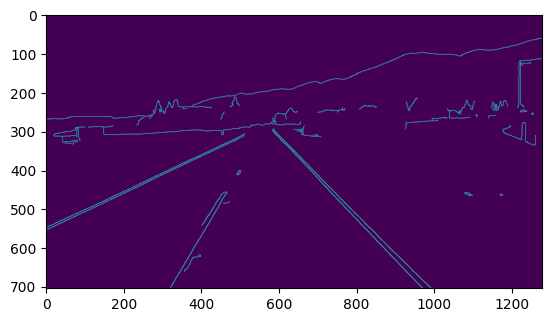

In [ ]:
#Region of Interest
import matplotlib.pyplot as plt
height=image.shape[0]
triangle=np.array([[(200,height),(1100,height),(550,250)]])
plt.imshow(canny)
mask=np.zeros_like(canny)
cv2.fillPoly(mask,triangle,255)
masked_image=cv2.bitwise_and(canny,mask)
#masked_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(masked_image)

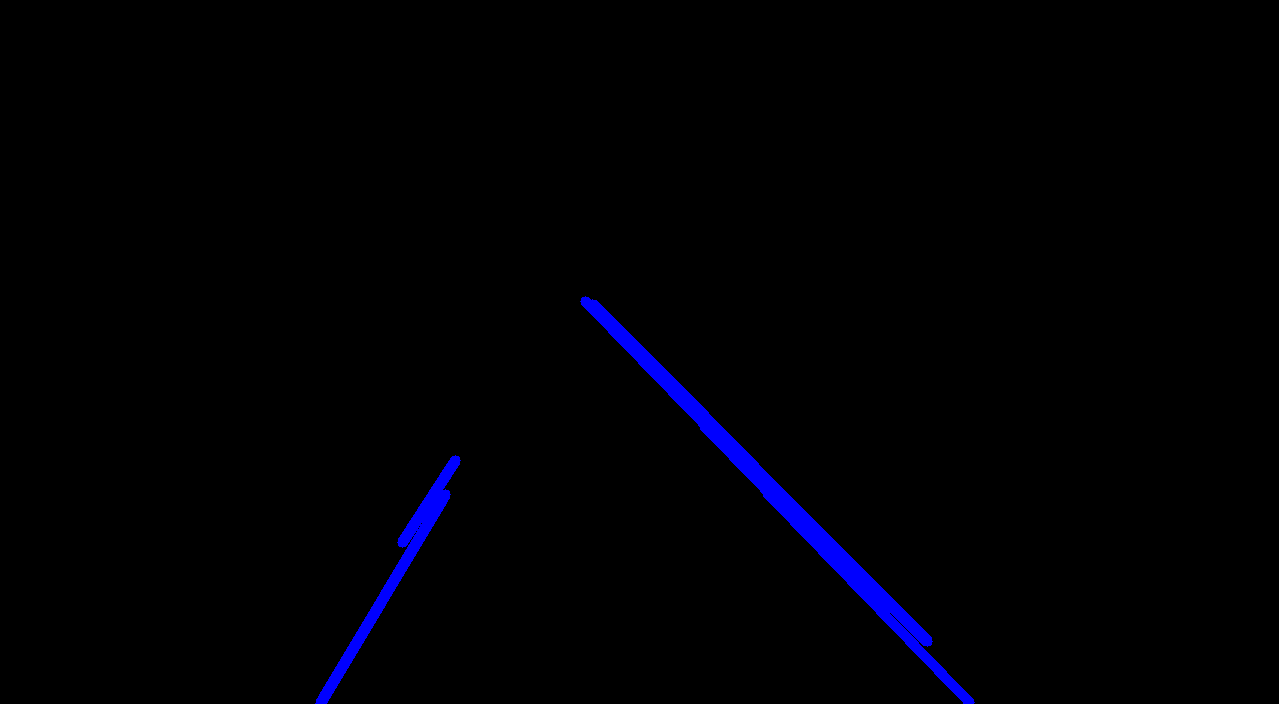

In [ ]:
def display_lines(image,lines):
  line_image=np.zeros_like(image)
  if lines is not None:
    for line in lines:
      x1,y1,x2,y2=line.reshape(4)
      cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
  return line_image


lines = cv2.HoughLinesP(masked_image,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
line_image=display_lines(lane_image,lines)
combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)
cv2_imshow(line_image)

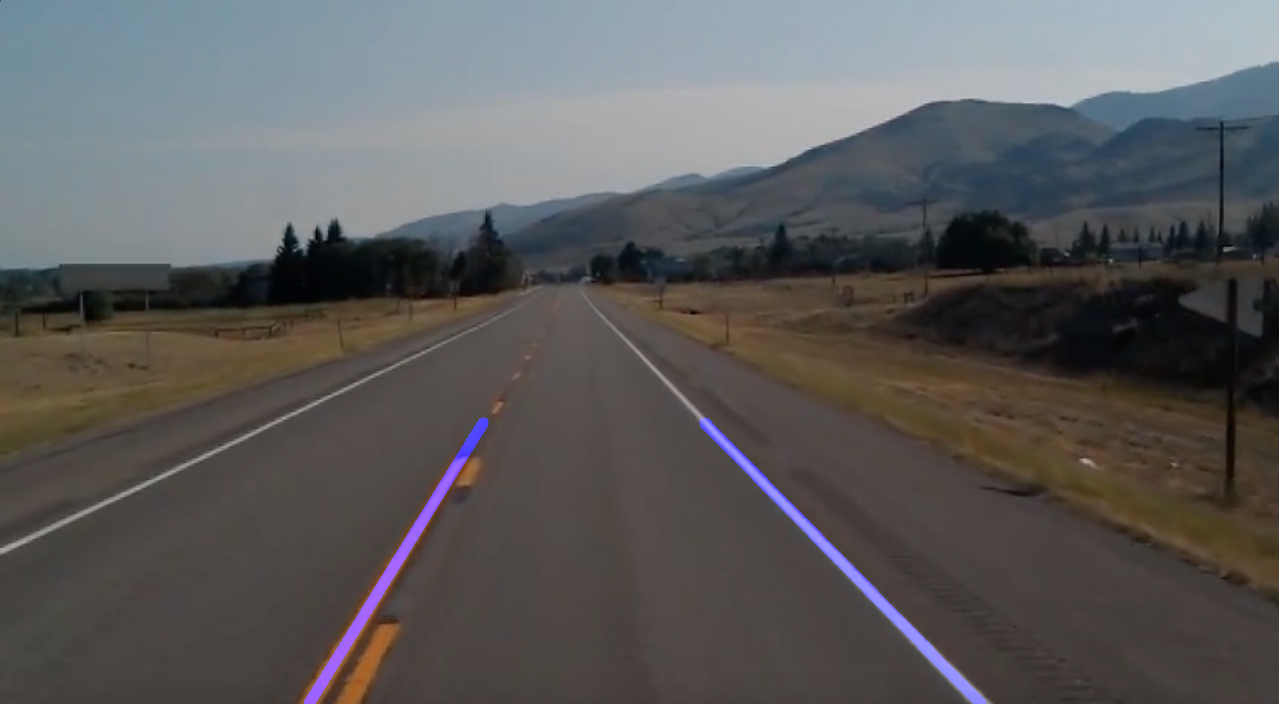

In [ ]:
combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)
def make_coordinates(image,line_parameters):
  slope,intercept=line_parameters
  y1=image.shape[0]
  y2=int(y1*(3/5))
  x1=int((y1-intercept)/slope)
  x2=int((y2-intercept)/slope)
  return np.array([x1,y1,x2,y2])
def average_slope_intercept(lane_image,lines):
  left_fit=[]
  right_fit=[]
  for line in lines:
    x1,y1,x2,y2=line.reshape(4)
    parameters=np.polyfit((x1,x2),(y1,y2),1)
    slope=parameters[0]
    intercept=parameters[1]
    if slope<0:
      left_fit.append((slope,intercept))
    else:
      right_fit.append((slope,intercept))
  left_fit_average=np.average(left_fit,axis=0)
  right_fit_average=np.average(right_fit,axis=0)
  left_line=make_coordinates(image,left_fit_average)
  right_line=make_coordinates(image,right_fit_average)

  return([left_line,right_line])
averaged_lines=average_slope_intercept(lane_image,lines)
line_image=display_lines(lane_image,averaged_lines)
combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)
cv2_imshow(combo_image)

In [ ]:
#testing the same using videos
uploaded = files.upload()
cap=cv2.VideoCapture("original.mp4")





Saving original.mp4 to original (1).mp4


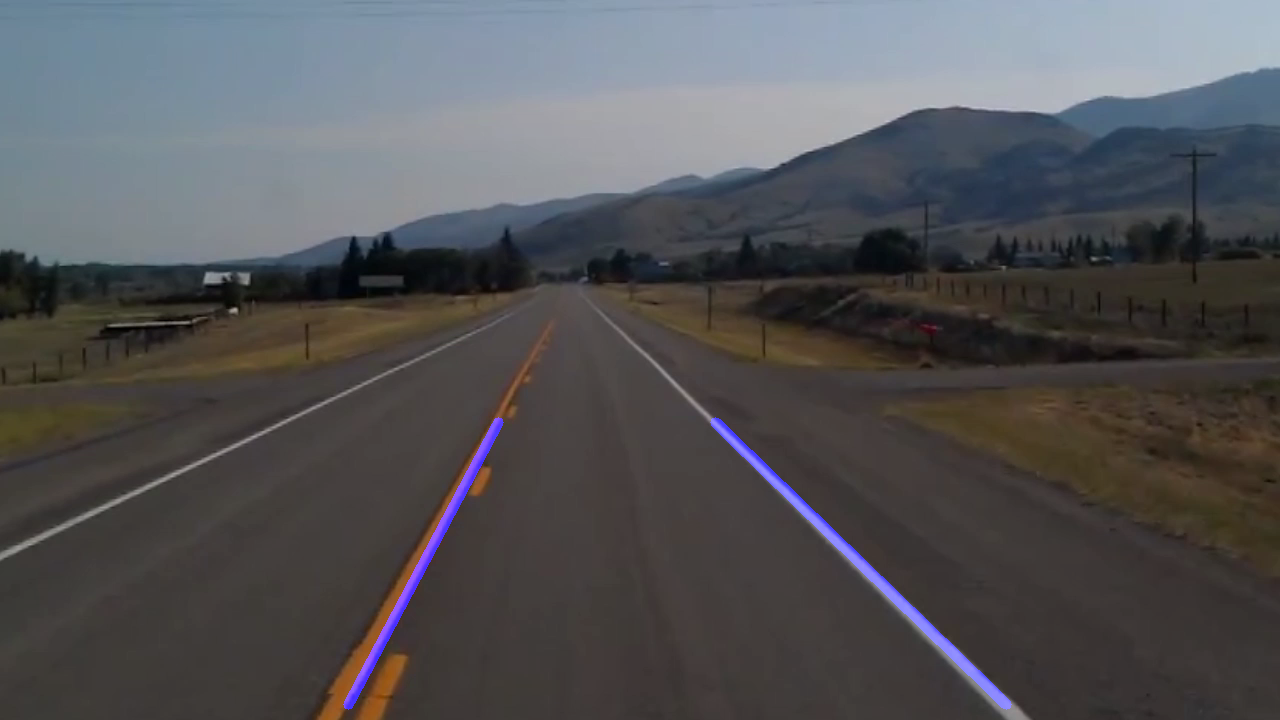

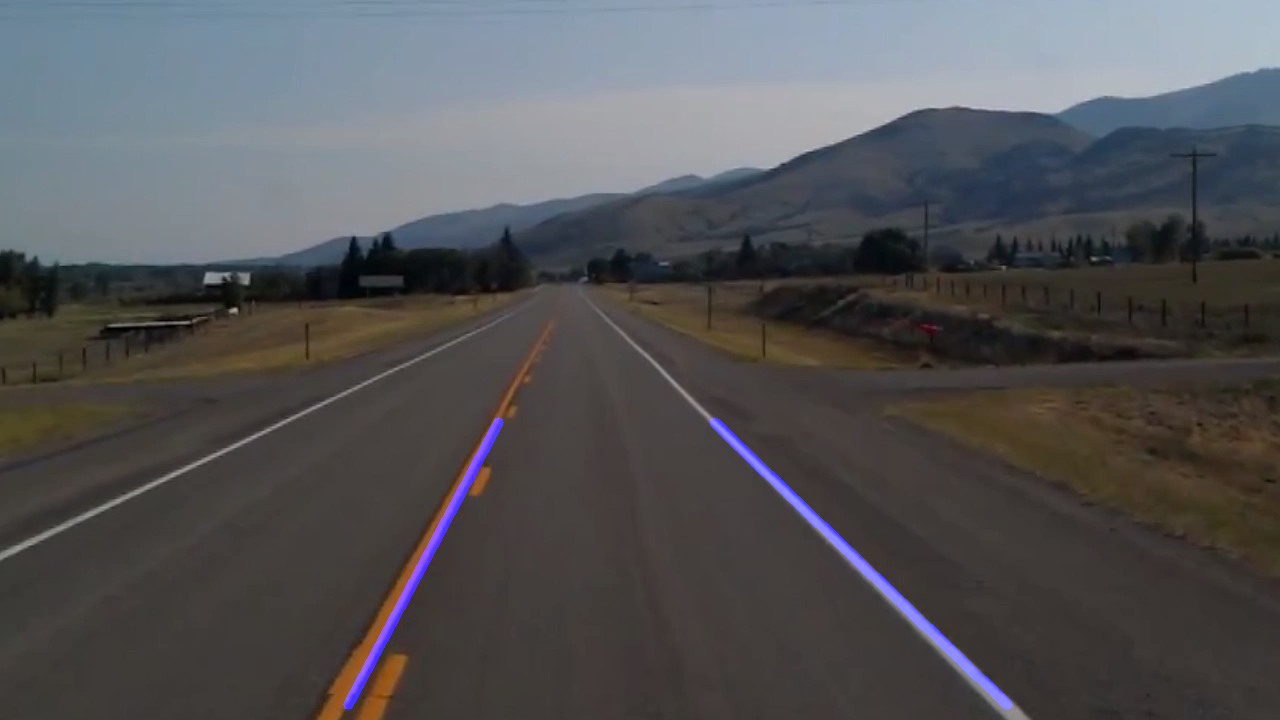

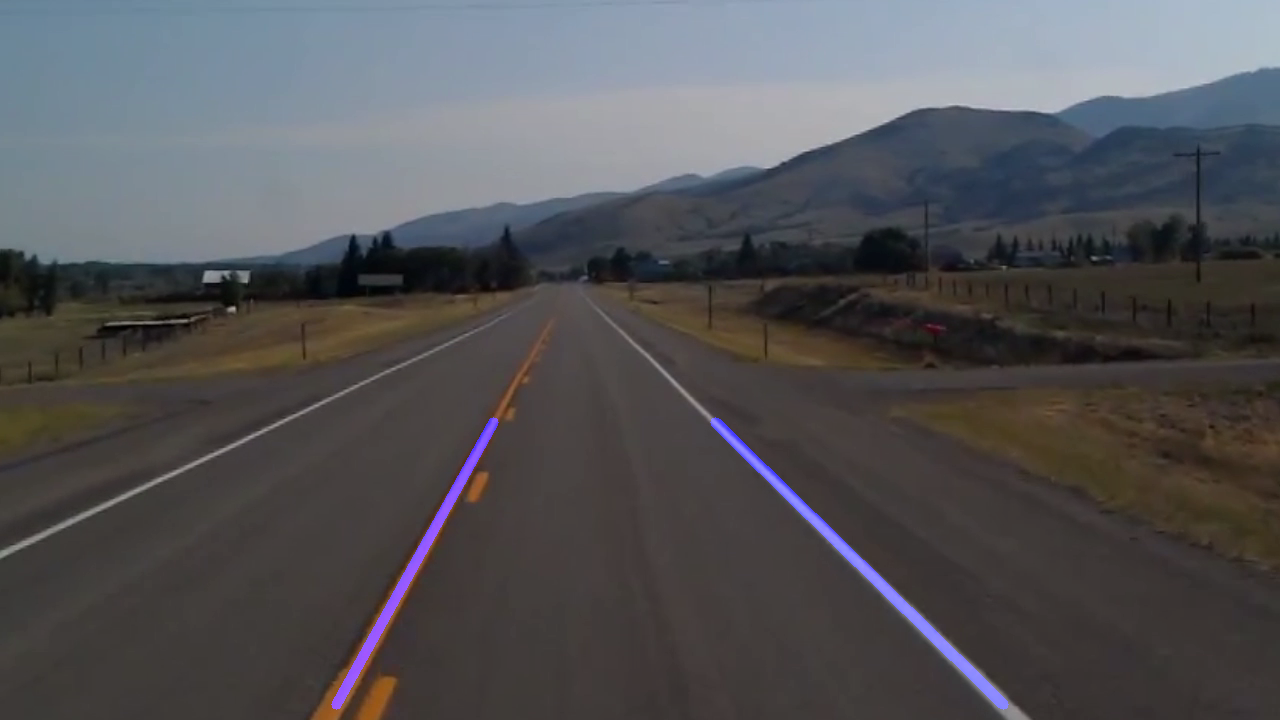

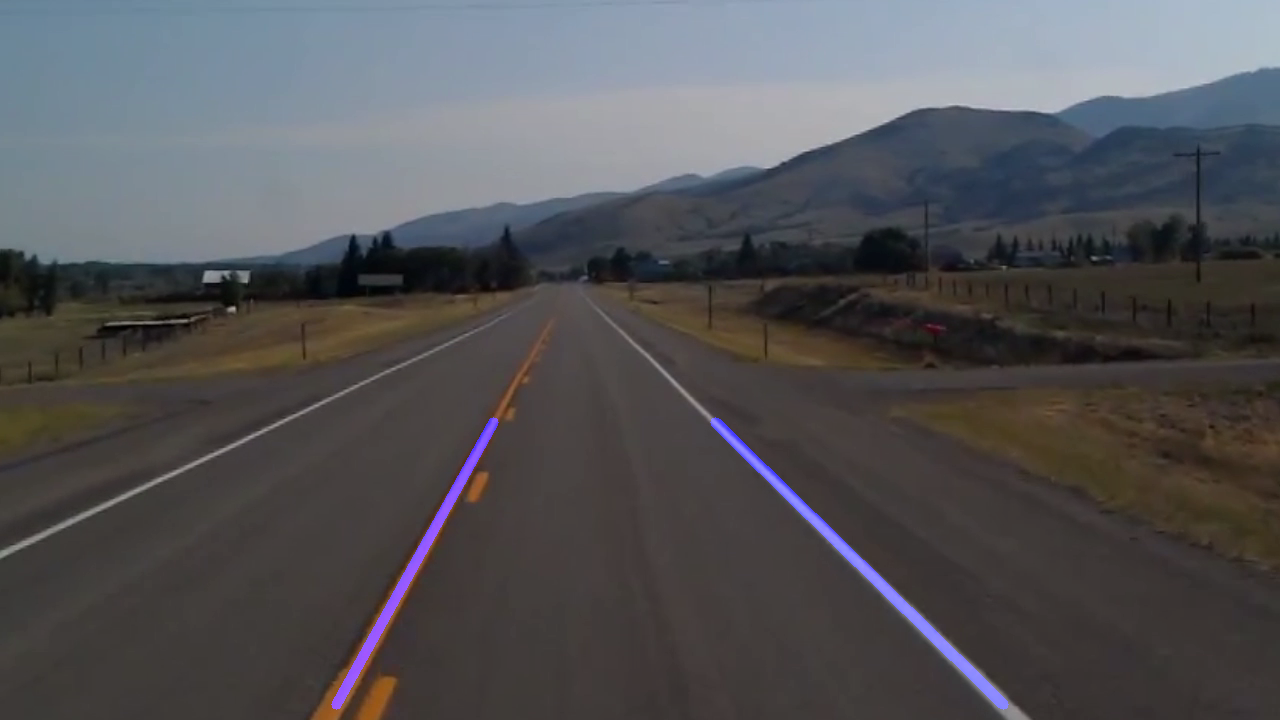

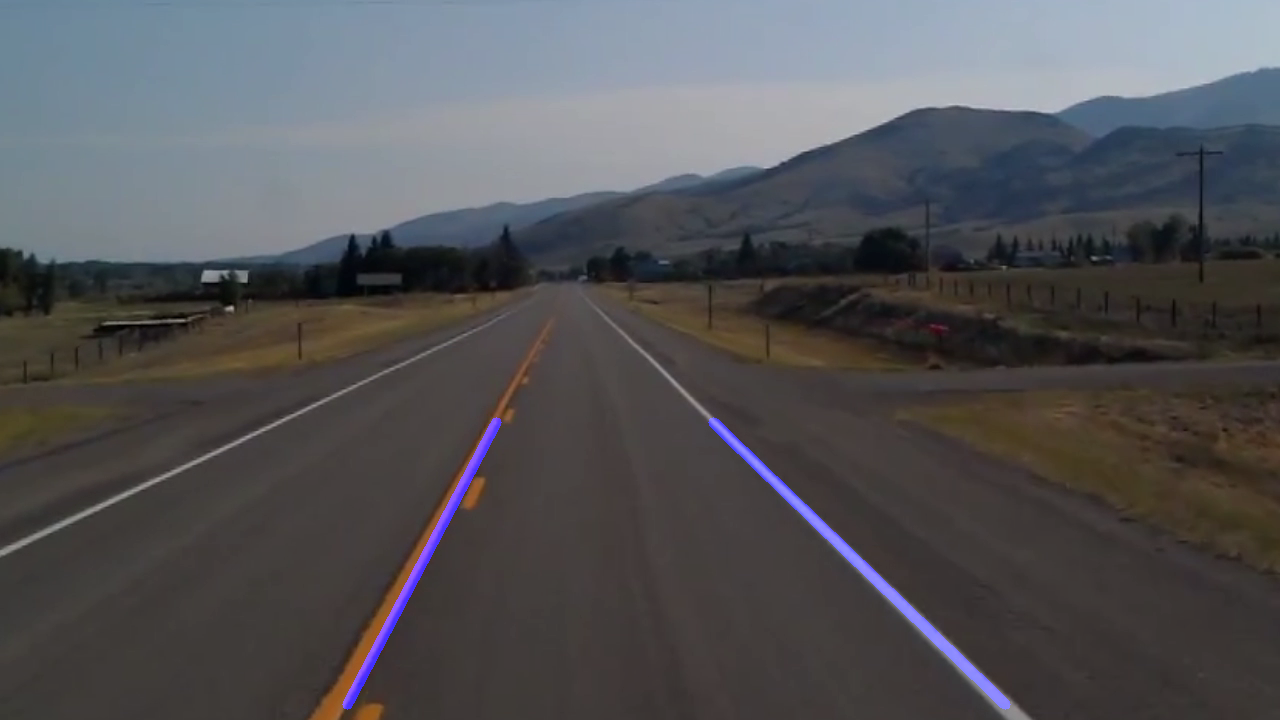

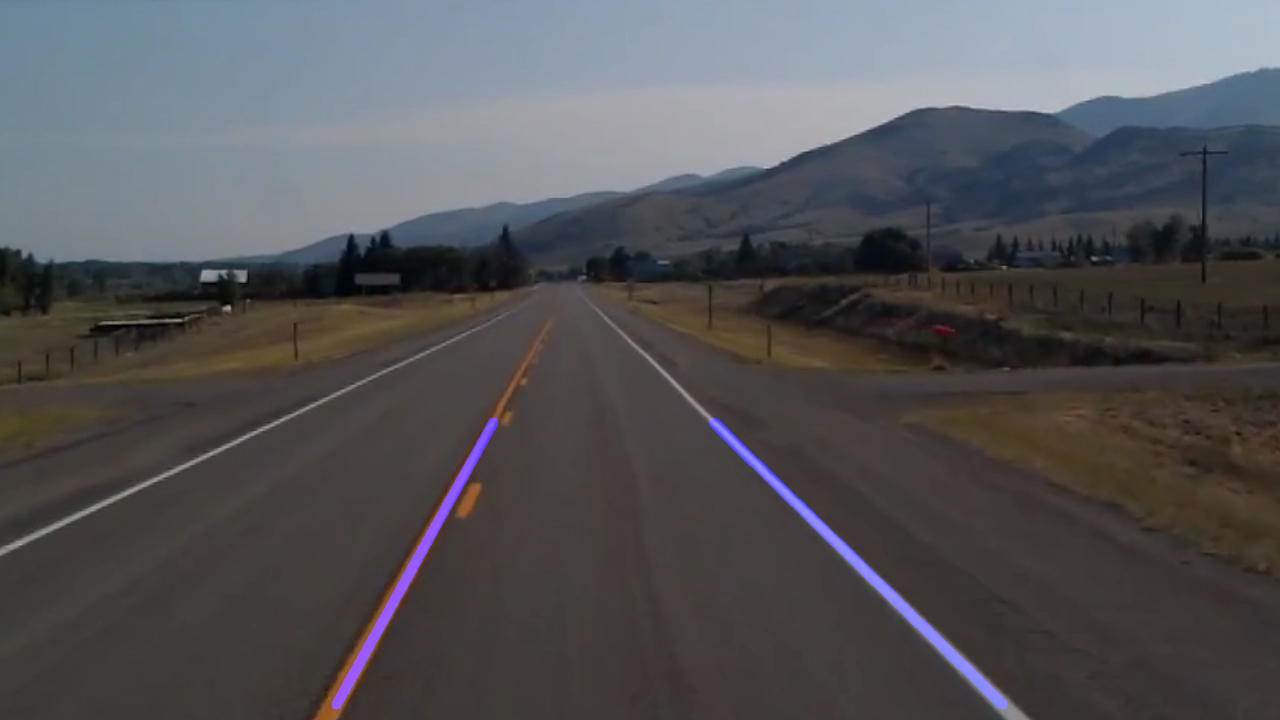

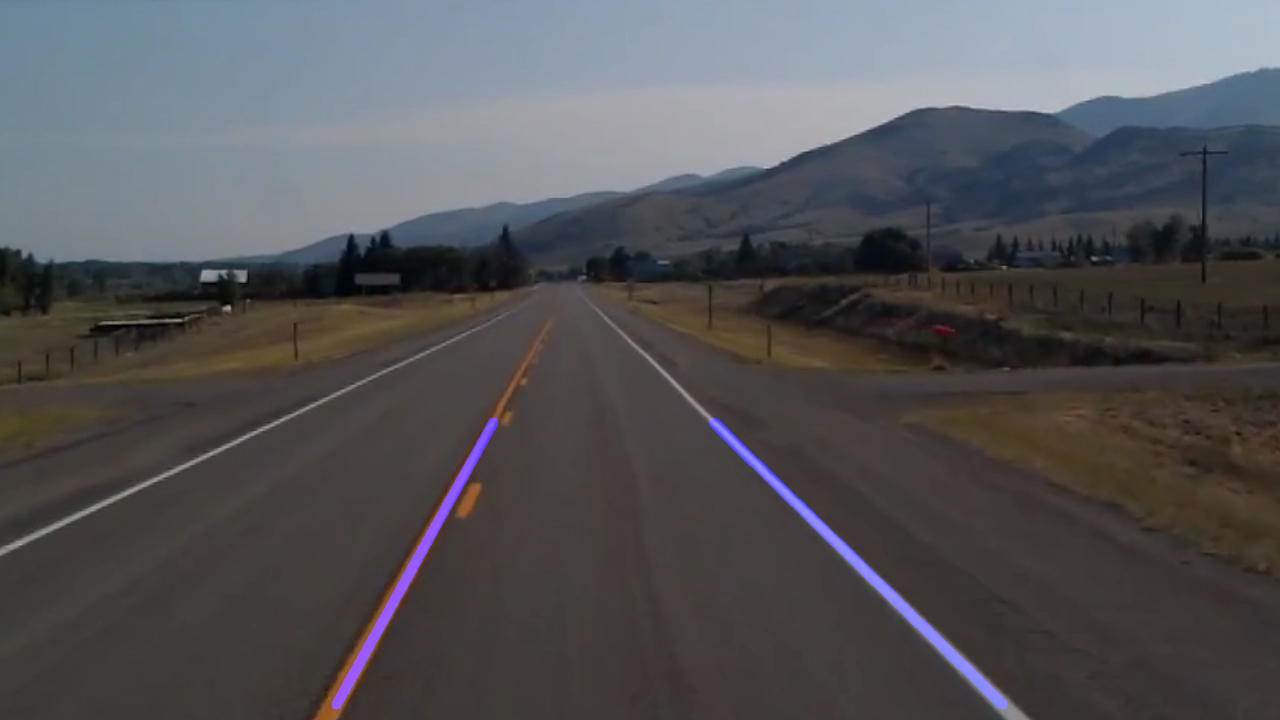

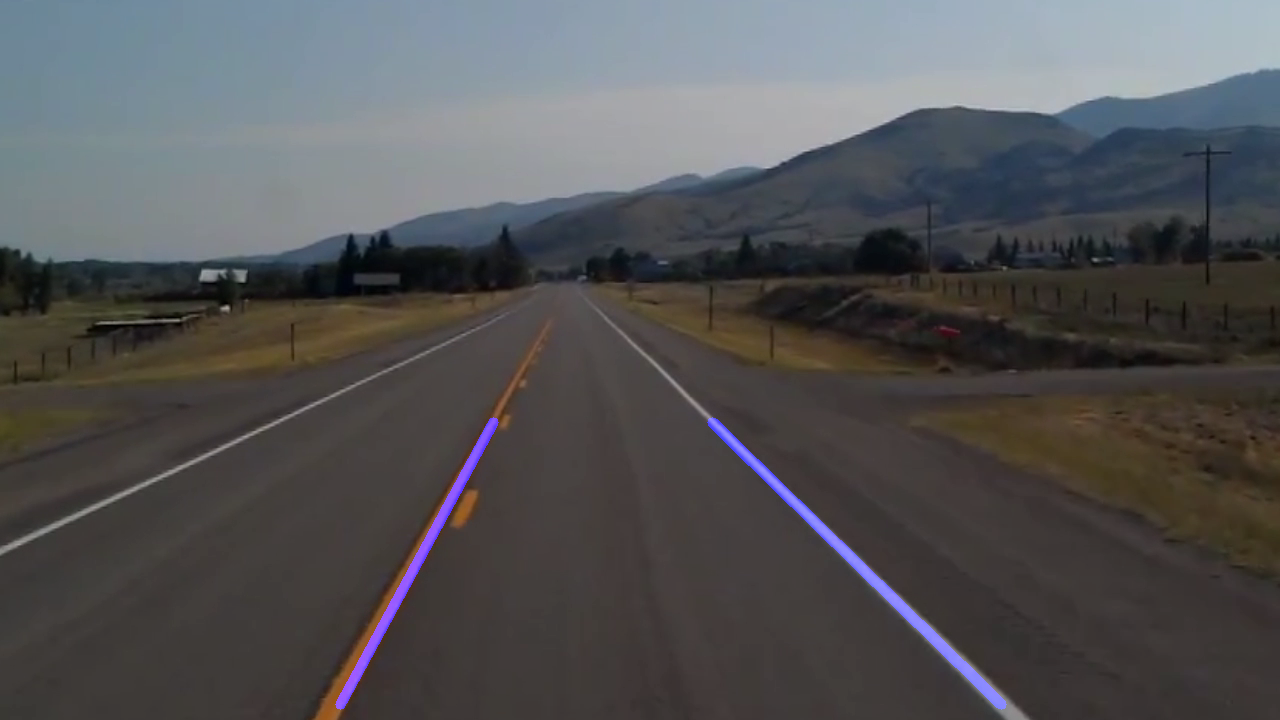

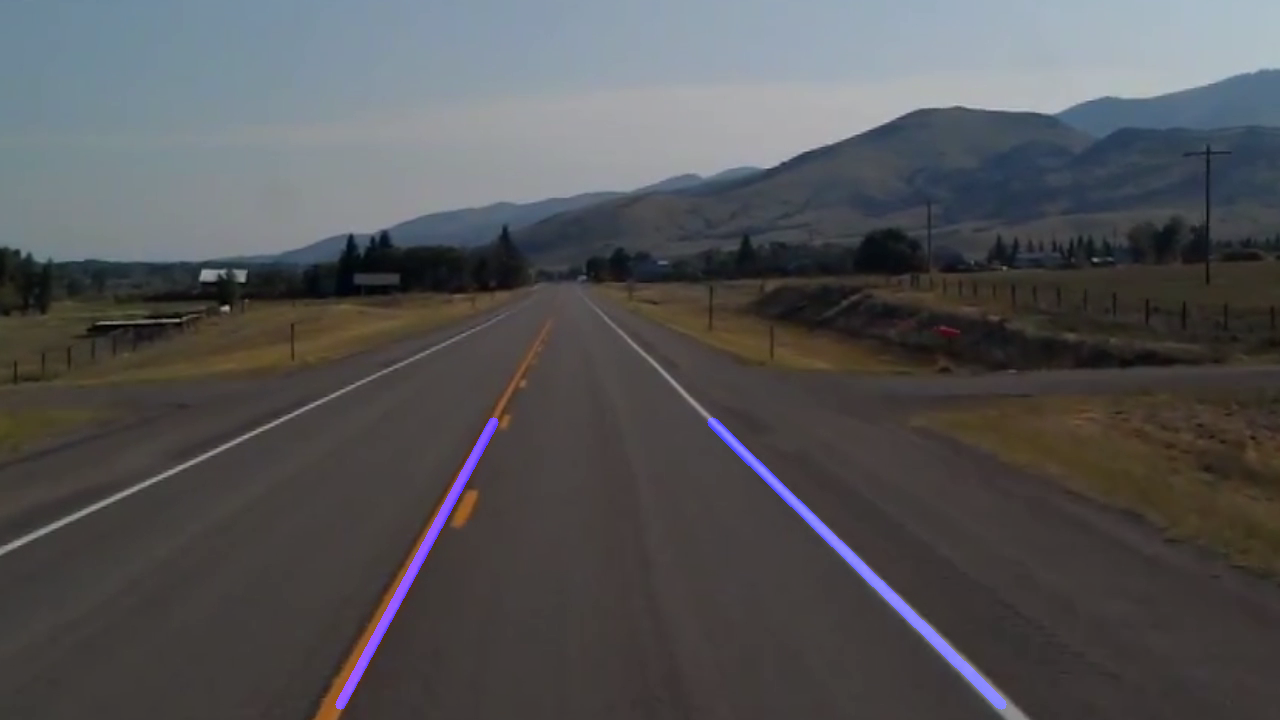

In [ ]:
while(cap.isOpened()):
  _,frame=cap.read()
  gray=cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)
  blur=cv2.GaussianBlur(gray,(5,5),0)
  canny=cv2.Canny(blur,50,150)
  height=image.shape[0]
  triangle=np.array([[(200,height),(1100,height),(550,250)]])
  plt.imshow(canny)
  mask=np.zeros_like(canny)
  cv2.fillPoly(mask,triangle,255)
  masked_image=cv2.bitwise_and(canny,mask)
  lines = cv2.HoughLinesP(masked_image,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
  line_image=display_lines(frame,lines)
  combo_image=cv2.addWeighted(frame,0.8,line_image,1,1)
  averaged_lines=average_slope_intercept(frame,lines)
  line_image=display_lines(frame,averaged_lines)
  combo_image=cv2.addWeighted(frame,0.8,line_image,1,1)
  cv2_imshow(combo_image)
  if cv2.waitKey(1) & 0xFF ==ord('q'):
    break
cap.release()
cv2.destroyAllWindows()
